Chapter 11
# 用Matplotlib绘制散点图
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习 

In [1]:
# 导入包
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np

In [2]:
# 加载鸢尾花数据集
iris = load_iris()

# 提取花萼长度和花萼宽度作为变量
sepal_length = iris.data[:, 0]
sepal_width = iris.data[:, 1]
target = iris.target

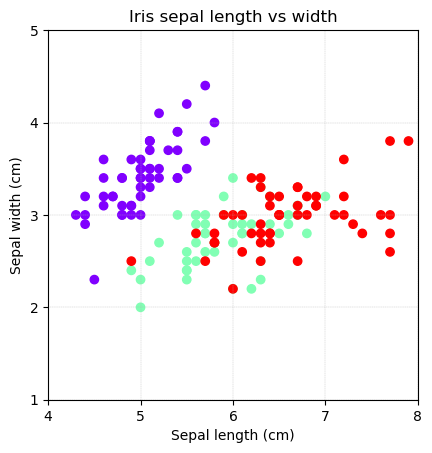

In [3]:
fig, ax = plt.subplots()

# 创建散点图
plt.scatter(sepal_length, sepal_width, c=target, cmap='rainbow')

# 添加标题和轴标签
plt.title('Iris sepal length vs width')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')

# 设置横纵轴刻度
ax.set_xticks(np.arange(4, 8 + 1, step=1))
ax.set_yticks(np.arange(1, 5 + 1, step=1))

# 设定横纵轴尺度1:1
ax.axis('scaled')

# 增加刻度网格，颜色为浅灰
ax.grid(linestyle='--', linewidth=0.25, color=[0.7,0.7,0.7])

# 设置横纵轴范围
ax.set_xbound(lower = 4, upper = 8)
ax.set_ybound(lower = 1, upper = 5)

# 显示图形
plt.show()